Modèle de scoring

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df=pd.read_csv('/gdrive/MyDrive/Machine Learning/Machine-Learning-par-la-pratique-avec-Python-master/data_credit.txt')
df.head()
#

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
#Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
#Statistique des données
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


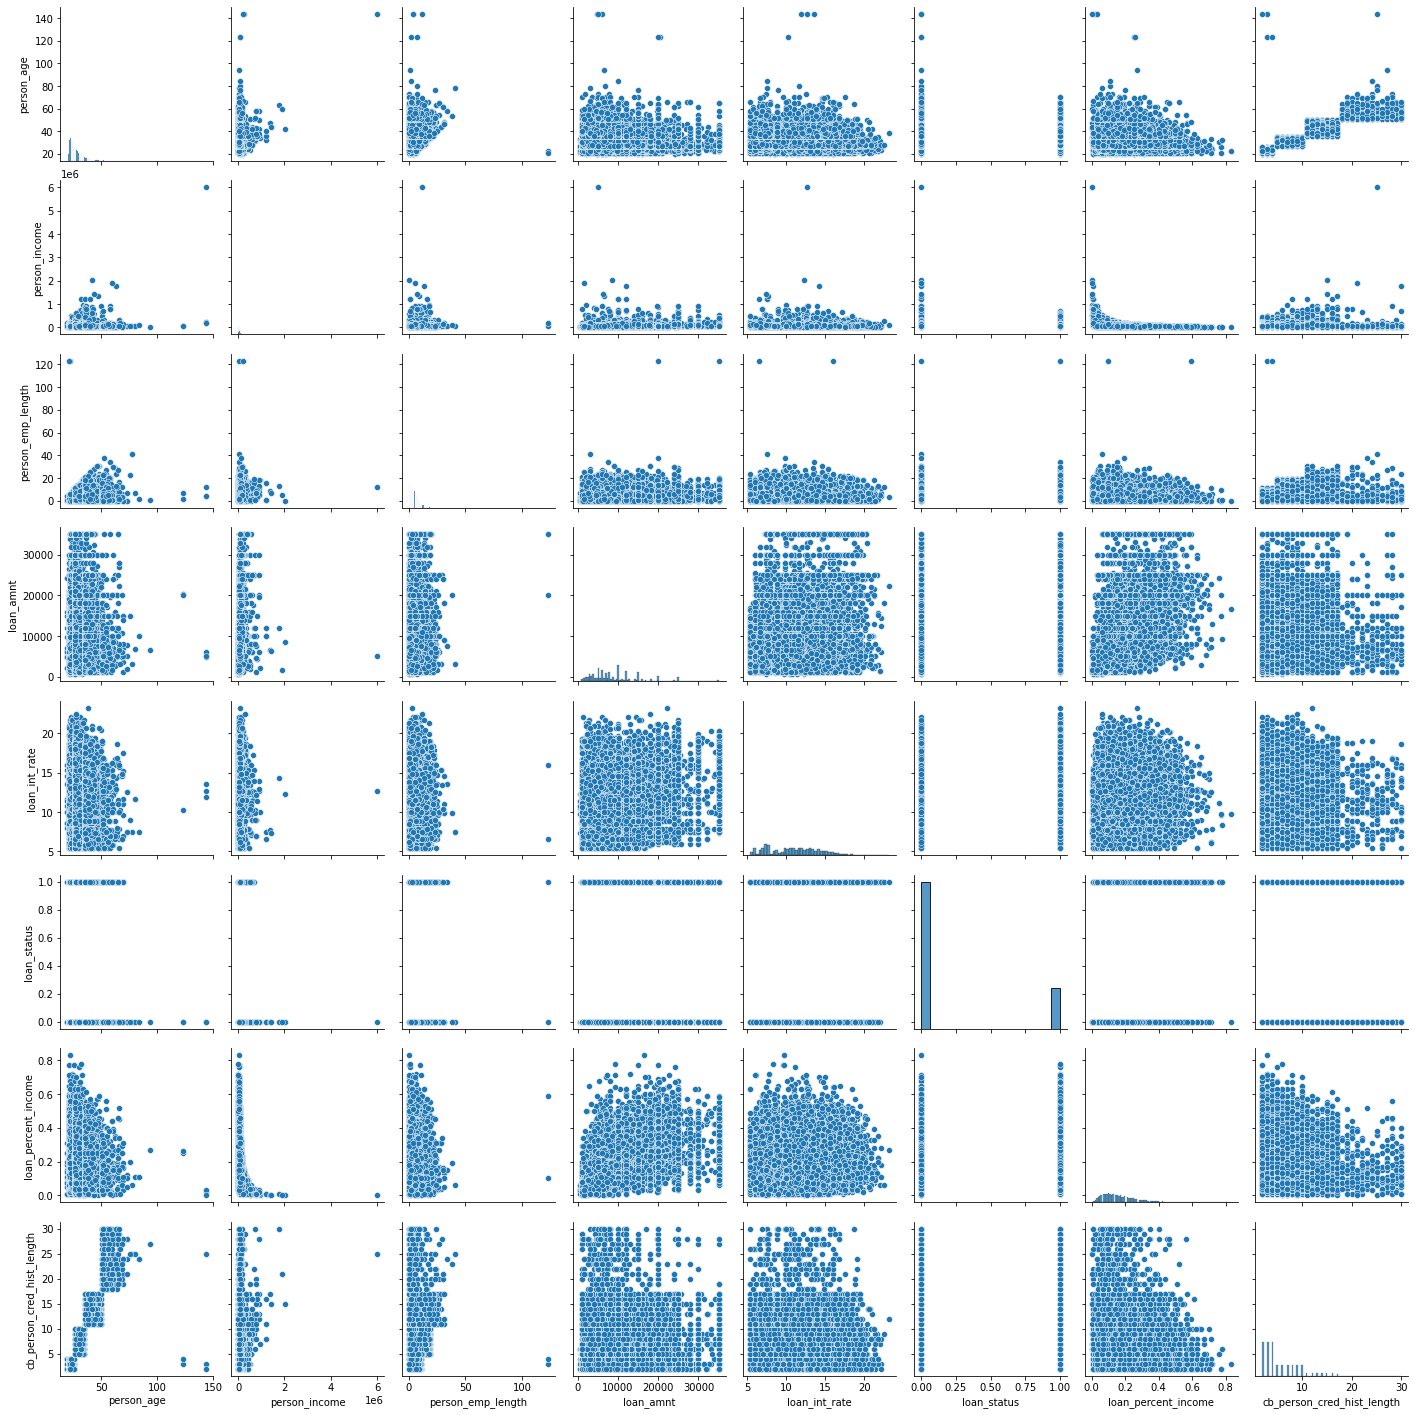

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
#Distribution de la variable 'loan_amnt'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


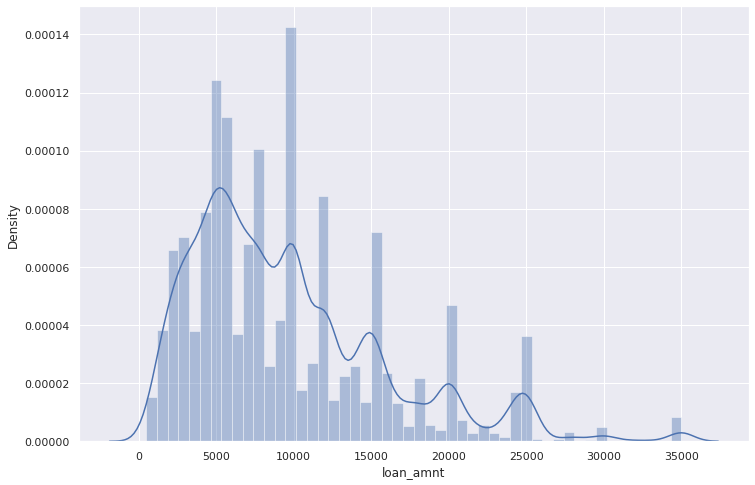

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['loan_amnt'])
plt.show()

In [10]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [11]:
#Transformation log de la variable 'personne_income'
df['person_income']=np.log(df['person_income'])

In [12]:
#Coefficient d'assymétrie de la variable transformée
df['person_income'].skew()

0.1559408016162584

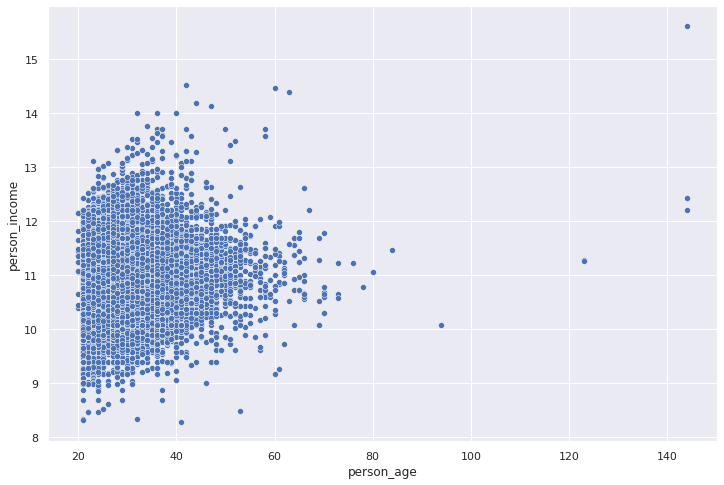

In [13]:
#Nuage de point revenu en fonction de l'age
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='person_age',y='person_income',data=df)
plt.show()

In [14]:
#Faisons une boucle for pour construire un diagramme à barre pour toutes les varialbles quantitatives

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


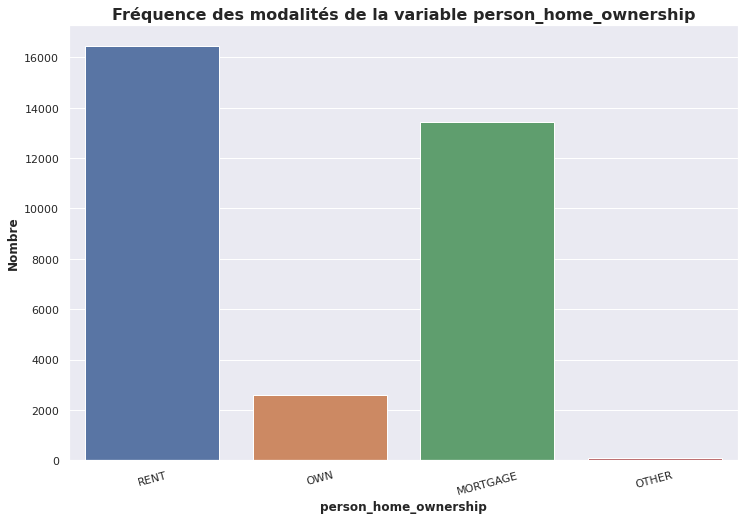

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


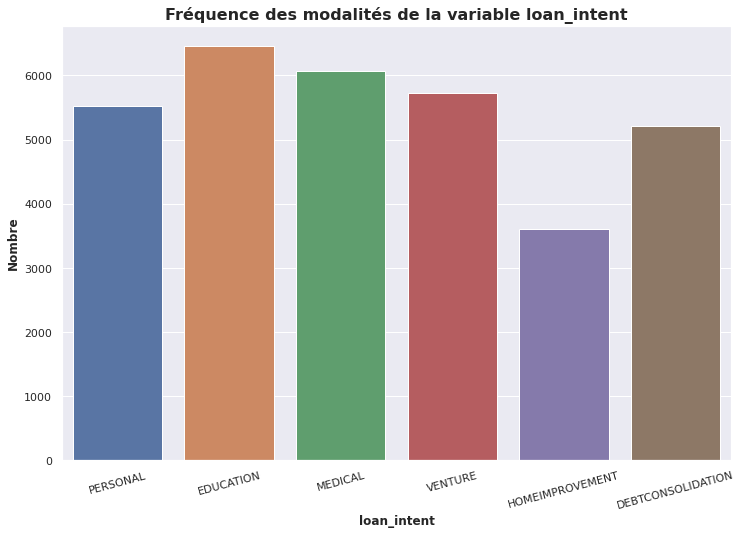

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


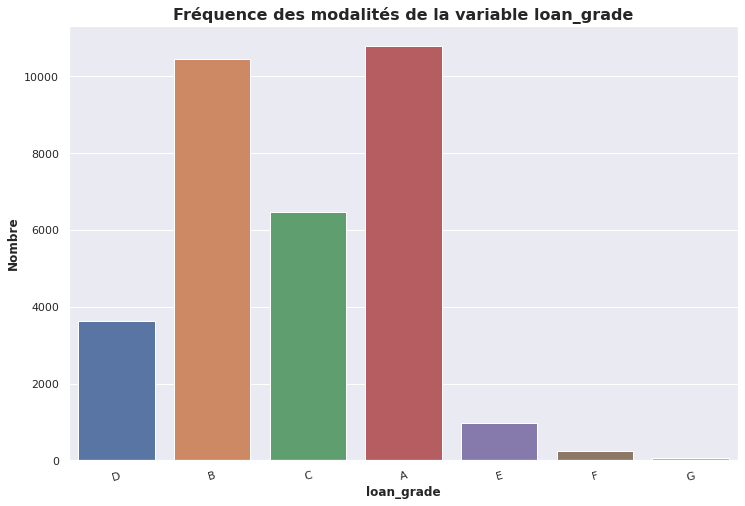

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


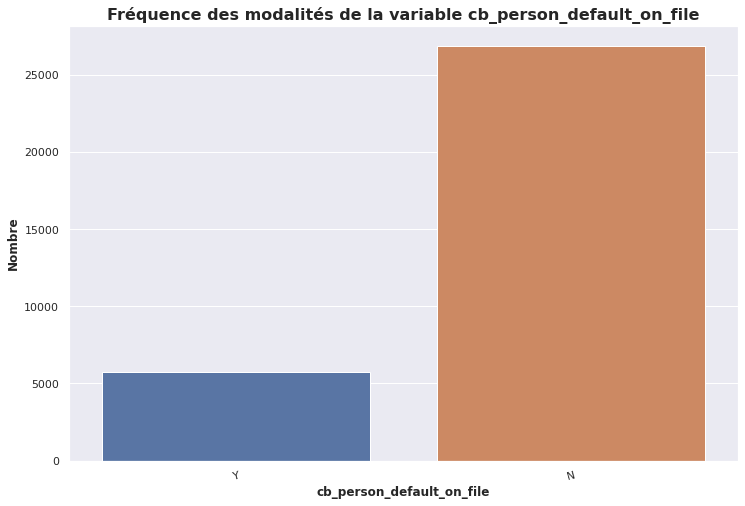

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


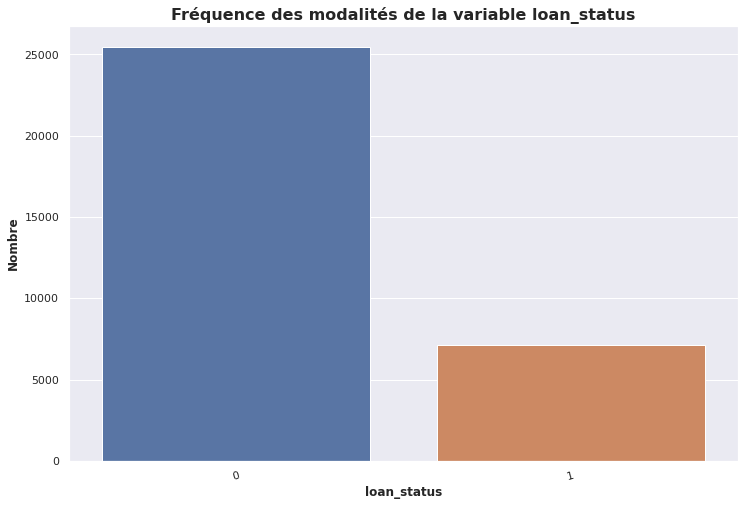

In [15]:
for col in df.select_dtypes(include=['object']).columns.to_list()+['loan_status']:
  sns.countplot(df[col])
  plt.xlabel(col,fontweight='bold')
  plt.ylabel('Nombre',fontweight='bold')
  plt.xticks(rotation=15)
  plt.title("Fréquence des modalités de la variable " +str(col),fontsize=16,fontweight="bold")
  plt.show()
  print('\n')

In [16]:
#Tableau croisé dynamique entre le motif du pret et le statut du pret
pd.crosstab(df["loan_intent"],df["loan_status"],margins=True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [17]:
#Tableau croisé dynamiqie de  l'accès à la propriété grpupé par le statut ainsi que le grade du crédit
pd.crosstab(df["person_home_ownership"],[df["loan_status"],df["loan_grade"]])

loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]

In [18]:
#Tableau croisée dynamique du % moyen de revenu par rapport au montant du pret groupé par les variables "person_home_ownership" et "loan_status"
pd.crosstab(df['person_home_ownership'],df['loan_status'],values=df['loan_percent_income'],aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


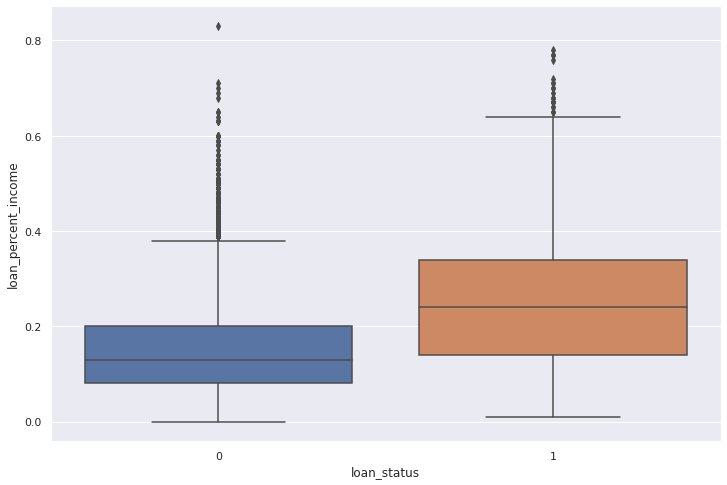

In [19]:
sns.boxplot(x='loan_status',y='loan_percent_income',data=df)
plt.show()

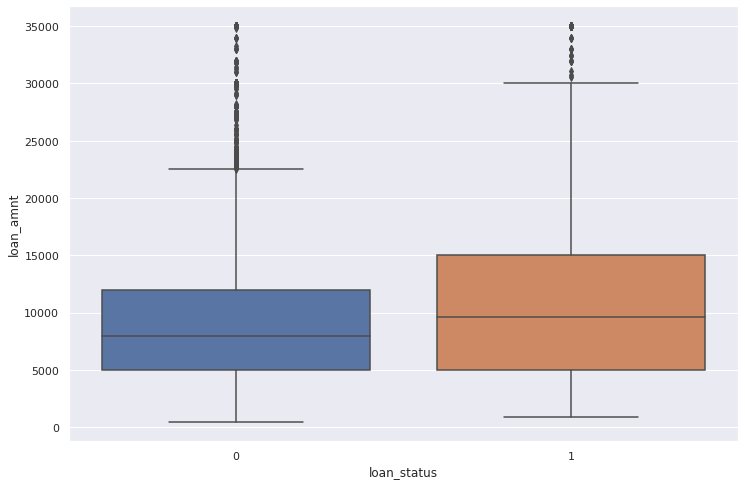

In [20]:
#loan_amnt vs laon_status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.show()


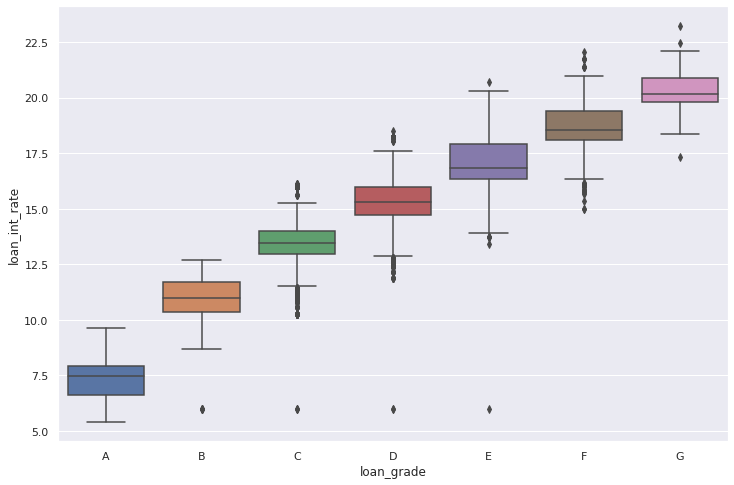

In [21]:
#loan_int_rate vs loan_grade
credit_grade=["A","B","C","D","E","F","G"]
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="loan_grade",y='loan_int_rate',data=df,order=credit_grade)

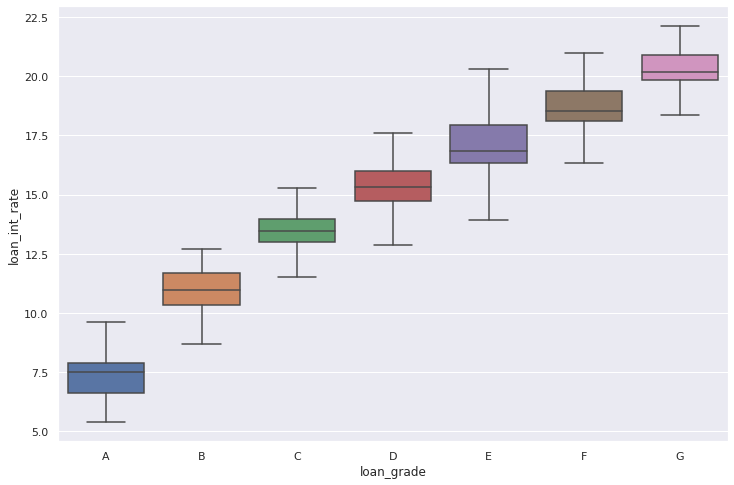

In [22]:
#Meme graphique sans les outliers 
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='loan_grade',y='loan_int_rate',sym="",data=df,order=credit_grade)
plt.show()

Correlation

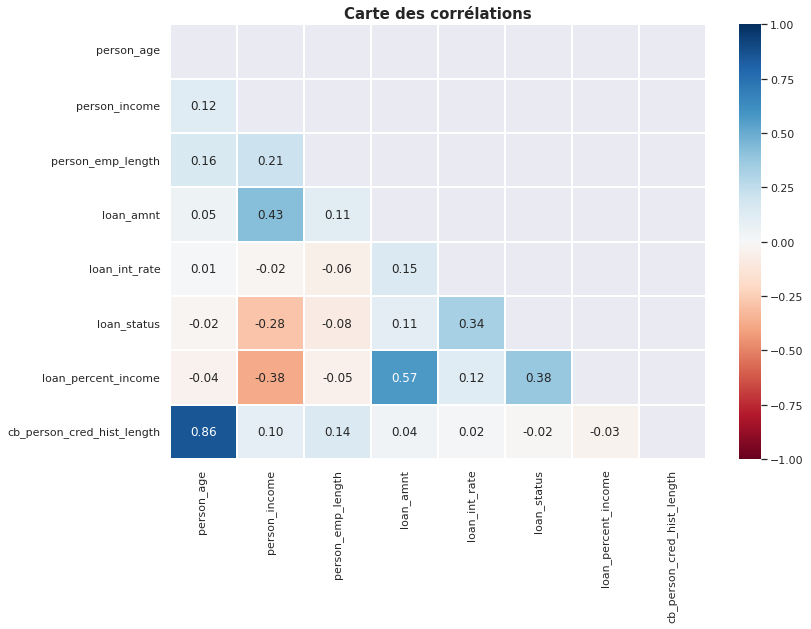

In [23]:
#Carte de corrélation
mask=np.triu(np.ones_like(df.select_dtypes(exclude=['object']).corr(),dtype=bool))
sns.heatmap(df.select_dtypes(exclude=['object']).corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
plt.show()

Nettoyage des donnes

**Detection des variables aberrantes basee sur l'inter-quatile (IQR)**

In [24]:
def detection_outliers_by_iqr(y):
  Q1,Q3=np.quantile(y,0.25),np.quantile(y,0.75)
  iqr=Q3-Q1
  borne_inf=Q1-iqr*1.5
  borne_sup=Q3+iqr*1.5
  return np.where((y>borne_sup)| (y<borne_inf))

In [25]:
#Suppresions des outliers
indeces_outliers_age=detection_outliers_by_iqr(df['person_age'])
print(indeces_outliers_age)
print(type(indeces_outliers_age))

(array([   81,   183,   575, ..., 32578, 32579, 32580]),)
<class 'tuple'>


In [26]:
indeces_outliers_age

(array([   81,   183,   575, ..., 32578, 32579, 32580]),)

In [27]:
indeces_outliers_age[0]

array([   81,   183,   575, ..., 32578, 32579, 32580])

In [28]:
#indeces_outliers_age est un tuple contenant un seul élément

In [29]:
df.drop(indeces_outliers_age[0],inplace=True)
df.shape

(31087, 12)

In [30]:
#Nombres de valeurs manquantes par colonne
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              861
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2953
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Imputation par la médiane

In [31]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())
#verifiction
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2953
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [32]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())
#verifiction
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Transformation des variables catégorielles en variale numériques

In [33]:
#dataframe des variables numériques
vars_num=df.select_dtypes(exclude=['object'])
vars_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,10.985293,123.0,35000,16.02,1,0.59,3
1,21,9.169518,5.0,1000,11.14,0,0.10,2
2,25,9.169518,1.0,5500,12.87,1,0.57,3
3,23,11.089805,4.0,35000,15.23,1,0.53,2
4,24,10.904119,8.0,35000,14.27,1,0.55,4


In [34]:
#dataframe des variables non numériques
vars_cat=df.select_dtypes(include=['object'])
vars_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [35]:
#Transformation des variables non-numériques
vars_cat_dummies=pd.get_dummies(vars_cat)

In [36]:
#Nouvelle dataframe
df_new=pd.concat([vars_num,vars_cat_dummies],axis=1)
print(df_new.shape)
df_new.head()

(31087, 27)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,10.985293,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,21,9.169518,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,9.169518,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,11.089805,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,10.904119,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [37]:
#Train/Test data
X=df_new.drop('loan_status',axis=1)
y=df_new['loan_status']
seed=123
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21760, 26)
(9327, 26)
(21760,)
(9327,)


RandomForestClassifier

In [39]:
#Création du modèle
rf=RandomForestClassifier(random_state=seed)
#Entrainement du modèle
rf.fit(X_train,y_train)

print("Le score sur les données d'entrainement est :", rf.score(X_train,y_train))
print("Le score sur les données d'évaluation est :", rf.score(X_test,y_test))

Le score sur les données d'entrainement est : 0.9999540441176471
Le score sur les données d'évaluation est : 0.9356706336442586


In [42]:
#Prédictions sur le test data
y_pred=rf.predict(X_test)
#Rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.94      9327
   macro avg       0.95      0.86      0.90      9327
weighted avg       0.94      0.94      0.93      9327



In [43]:
#Importance des variables de prédiction

In [45]:
vars_imp=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
vars_imp

loan_percent_income               0.227448
person_income                     0.143809
loan_int_rate                     0.109570
loan_amnt                         0.076076
person_emp_length                 0.060354
person_home_ownership_RENT        0.050525
loan_grade_D                      0.048754
person_age                        0.044365
cb_person_cred_hist_length        0.034412
person_home_ownership_MORTGAGE    0.028716
loan_intent_DEBTCONSOLIDATION     0.023212
loan_intent_MEDICAL               0.022241
loan_grade_C                      0.019900
person_home_ownership_OWN         0.018639
loan_intent_HOMEIMPROVEMENT       0.014150
loan_grade_E                      0.011795
loan_grade_A                      0.010900
loan_intent_EDUCATION             0.010697
loan_intent_PERSONAL              0.008946
loan_intent_VENTURE               0.008513
cb_person_default_on_file_N       0.007469
cb_person_default_on_file_Y       0.006634
loan_grade_B                      0.005134
loan_grade_

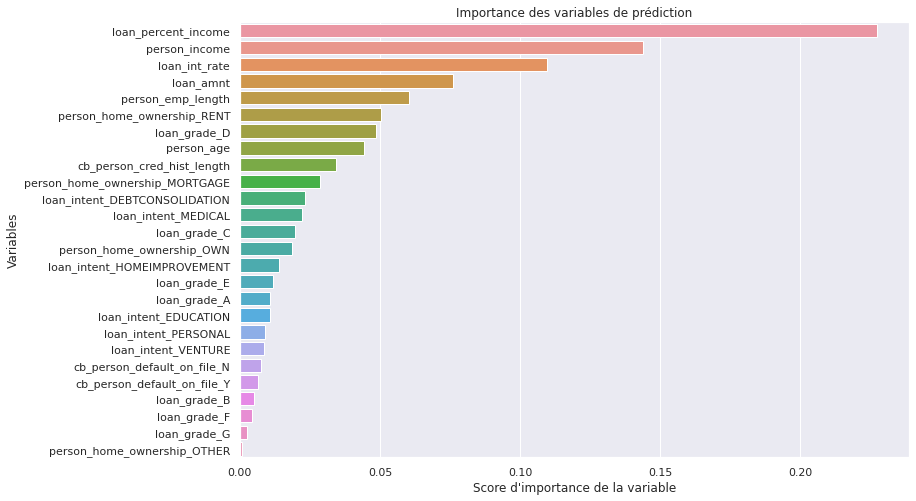

In [46]:
#Visualisation de l'imprtance des variables importantes
sns.barplot(x=vars_imp,y=vars_imp.index)
plt.xlabel("Score d'importance de la variable")
plt.ylabel('Variables')
plt.title("Importance des variables de prédiction")
plt.show()

ReConstruction d'un modèle de forets Aléatoire

In [47]:
#Variable dont le score d'importance est supérieur à 0,010
vars_selected=vars_imp[vars_imp>0.010].index.to_list()
vars_selected

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_amnt',
 'person_emp_length',
 'person_home_ownership_RENT',
 'loan_grade_D',
 'person_age',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_MEDICAL',
 'loan_grade_C',
 'person_home_ownership_OWN',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_grade_E',
 'loan_grade_A',
 'loan_intent_EDUCATION']

In [50]:
#Nouvelle division des données
X_train,X_test,y_train,y_test=train_test_split(X[vars_selected],y,stratify=y,test_size=0.3,random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21760, 18)
(9327, 18)
(21760,)
(9327,)


In [51]:
#Création du modèle
rf2=RandomForestClassifier(random_state=seed)
#Entrainement du modèle
rf2.fit(X_train,y_train)
#Prédiction
y_pred2=rf2.predict(X_test)

In [52]:
#Rapport de classification
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.93      9327
   macro avg       0.95      0.86      0.89      9327
weighted avg       0.94      0.93      0.93      9327



Methode de sous-echantillonage

In [53]:
#Concaténation de X_train,y_train

In [60]:
df_train=pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)


In [61]:
#Nombre de prêt dans chaque classe
n_nondefauts,n_defauts=df_train['loan_status'].value_counts()

In [62]:
n_nondefauts,n_defauts

(17008, 4752)

In [63]:
#dataframe des prets en défaut et dataframe des prets en non défauts
defauts_df=df_train[df_train['loan_status']==1]
nondefauts_df=df_train[df_train['loan_status']==0]

In [64]:
#Sous-échantillonage des non defauts
nondefauts_df2=nondefauts_df.sample(n_defauts)
#concaténations
df_train2=pd.concat([nondefauts_df2.reset_index(drop=True),defauts_df.reset_index(drop=True)],axis=0)

In [65]:
#Vérification du nombre de prets de chaque classe
df_train2['loan_status'].value_counts()

0    4752
1    4752
Name: loan_status, dtype: int64

In [66]:
#Construction du modèle de foret aléatoire 

In [67]:
X=df_train2.drop('loan_status',axis=1)
y=df_train2['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=seed)

In [69]:
#Création du modèle
rf3=RandomForestClassifier(random_state=seed)
#Entrainement du modèle
rf3.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [70]:
#Prédictions
y_pred3=rf3.predict(X_test)
#Rapport de Classification
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1426
           1       0.90      0.78      0.84      1426

    accuracy                           0.85      2852
   macro avg       0.85      0.85      0.85      2852
weighted avg       0.85      0.85      0.85      2852

